In [193]:
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

In [194]:
data=pd.read_csv("C:/Users/ASUSF556U/Desktop/myProject/dataSet.csv", delimiter=';')
print("The dataset is {} credit record".format(len(data)))



The dataset is 1000 credit record


In [195]:
data.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [196]:
print(data.isna().sum())

X01    0
X02    0
X03    0
X04    0
X05    0
X06    0
X07    0
X08    0
X09    0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
Y      0
dtype: int64


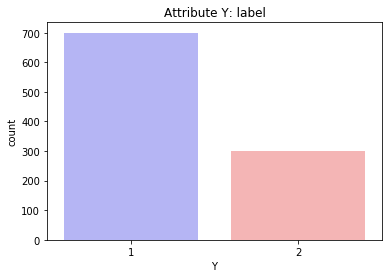

In [197]:
sns.countplot(x='Y', data=data, palette="bwr")
plt.title('Attribute Y: label')
plt.show()

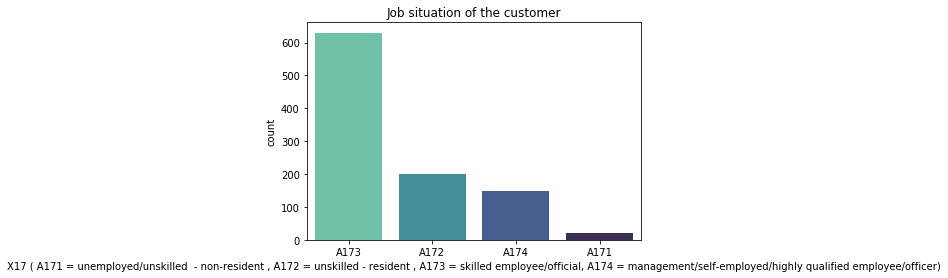

In [198]:
sns.countplot(x='X17', data=data, palette="mako_r")
plt.title('Job situation of the customer')
plt.xlabel("X17 ( A171 = unemployed/unskilled  - non-resident , A172 = unskilled - resident , A173 = skilled employee/official, A174 = management/self-employed/highly qualified employee/officer)")
plt.show()

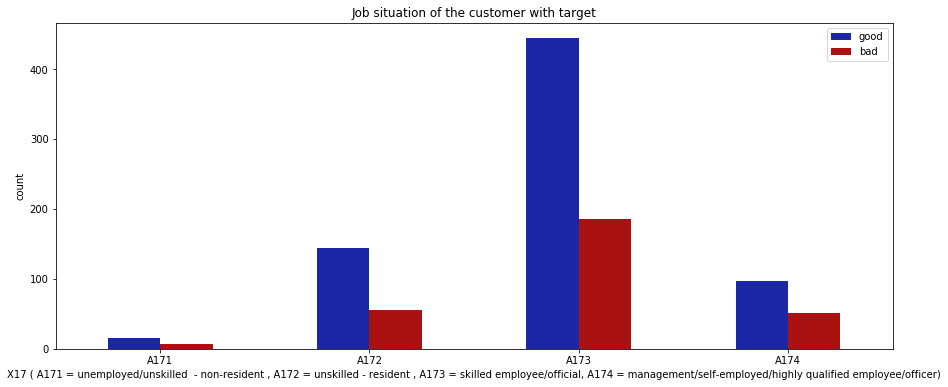

In [199]:
pd.crosstab(data.X17,data.Y).plot(kind="bar",figsize=(15,6),color=['#1c27a5','#AA1111' ])
plt.title('Job situation of the customer with target')
plt.xlabel('X17 ( A171 = unemployed/unskilled  - non-resident , A172 = unskilled - resident , A173 = skilled employee/official, A174 = management/self-employed/highly qualified employee/officer)')
plt.xticks(rotation=0)
plt.legend(["good", "bad"])
plt.ylabel('count')
plt.show()

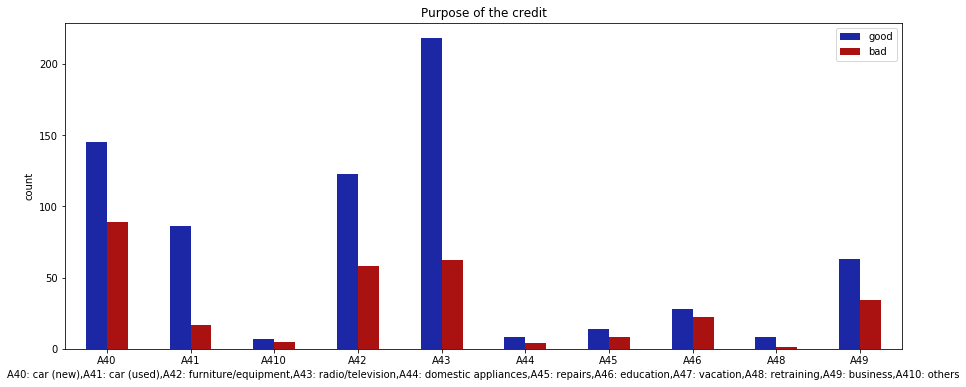

In [200]:
pd.crosstab(data.X04,data.Y).plot(kind="bar",figsize=(15,6),color=['#1c27a5','#AA1111' ])
plt.title('Purpose of the credit')
plt.xlabel('A40: car (new),A41: car (used),A42: furniture/equipment,A43: radio/television,A44: domestic appliances,A45: repairs,A46: education,A47: vacation,A48: retraining,A49: business,A410: others')
plt.xticks(rotation=0)
plt.legend(["good", "bad"])
plt.ylabel('count')
plt.show()


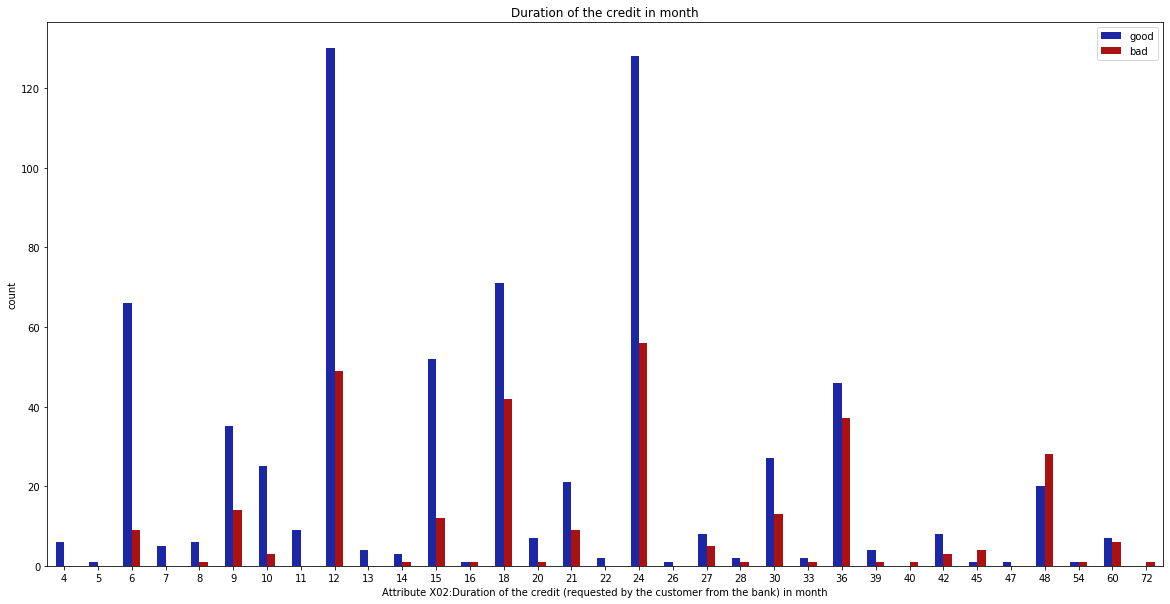

In [201]:
pd.crosstab(data.X02,data.Y).plot(kind="bar",figsize=(20,10),color=['#1c27a5','#AA1111' ])
plt.title('Duration of the credit in month')
plt.xlabel('Attribute X02:Duration of the credit (requested by the customer from the bank) in month')
plt.xticks(rotation=0)
plt.legend(["good", "bad"])
plt.ylabel('count')
plt.show()

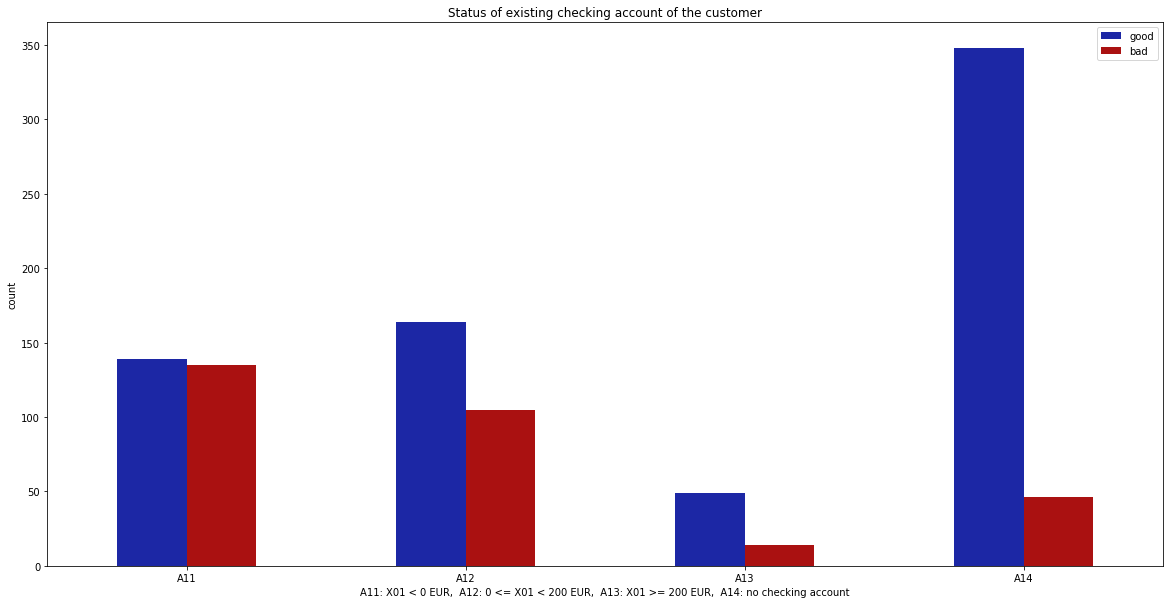

In [202]:
pd.crosstab(data.X01,data.Y).plot(kind="bar",figsize=(20,10),color=['#1c27a5','#AA1111' ])
plt.title('Status of existing checking account of the customer')
plt.xlabel('A11: X01 < 0 EUR,  A12: 0 <= X01 < 200 EUR,  A13: X01 >= 200 EUR,  A14: no checking account')
plt.xticks(rotation=0)
plt.legend(["good", "bad"])
plt.ylabel('count')
plt.show()

In [203]:
data.groupby('Y').mean()

,X02,X05,X08,X11,X13,X16,X18
Y,,,,,,,
1,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
2,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
X01    1000 non-null object
X02    1000 non-null int64
X03    1000 non-null object
X04    1000 non-null object
X05    1000 non-null int64
X06    1000 non-null object
X07    1000 non-null object
X08    1000 non-null int64
X09    1000 non-null object
X10    1000 non-null object
X11    1000 non-null int64
X12    1000 non-null object
X13    1000 non-null int64
X14    1000 non-null object
X15    1000 non-null object
X16    1000 non-null int64
X17    1000 non-null object
X18    1000 non-null int64
X19    1000 non-null object
X20    1000 non-null object
Y      1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [205]:
num_data = data[['X02','X05','X08','X11','X13','X16','X18']]
num_data

,X02,X05,X08,X11,X13,X16,X18
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [206]:
cat_data = data[['X01','X03','X04','X06','X07','X09','X10','X12','X14','X15','X17','X20']]
cat_data 

,X01,X03,X04,X06,X07,X09,X10,X12,X14,X15,X17,X20
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A201
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A201
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A201
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A201
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A201


In [207]:
cat_data = cat_data.apply(LabelEncoder().fit_transform)

In [208]:
frames = [num_data, cat_data.reindex(num_data.index)]
result = pd.concat(frames,sort=True, axis=1)
result

,X02,X05,X08,X11,X13,X16,X18,X01,X03,X04,X06,X07,X09,X10,X12,X14,X15,X17,X20
0,6,1169,4,4,67,2,1,0,4,4,4,4,2,0,0,2,1,2,0
1,48,5951,2,2,22,1,1,1,2,4,0,2,1,0,0,2,1,2,0
2,12,2096,2,3,49,1,2,3,4,7,0,3,2,0,0,2,1,1,0
3,42,7882,2,4,45,1,2,0,2,3,0,3,2,2,1,2,2,2,0
4,24,4870,3,4,53,2,2,0,3,0,0,2,2,0,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,3,2,3,0,3,1,0,0,2,1,1,0
996,30,3857,4,4,40,1,1,0,2,1,0,2,0,0,1,2,1,3,0
997,12,804,4,4,38,1,1,3,2,4,0,4,2,0,2,2,1,2,0
998,45,1845,4,4,23,1,1,0,2,4,0,2,2,0,3,2,2,2,0


In [209]:
X = result
y = data.Y

In [210]:
# SVM classifier using all the features
X_train, X_test, y_train, y_test = train_test_split(result,y,test_size = 0.2)
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
accuracy = accuracy_score (y_test, predictions)
print("Accuracy of SVM {:.2f}%".format(accuracy))

Accuracy of SVM 0.67%


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [211]:
###
precision, recall, fscore, support = score(y_test, predictions, average=None, labels=[1,2])
dff = pd.DataFrame({'Labels':[1,2], 'Precision':precision, 'Recall':recall,'F-Score': fscore, 'Support': support})
print(dff.to_string(index=False))


 Labels  Precision  Recall   F-Score  Support
      1       0.67     1.0  0.802395      134
      2       0.00     0.0  0.000000       66


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [212]:
X = num_data
y = data.Y

In [213]:
# SVM classifier using Numerical Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
accuracy = accuracy_score (y_test, predictions)
print("Accuracy of SVM {:.2f}%".format(accuracy))

Accuracy of SVM 0.68%


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [214]:
###
precision, recall, fscore, support = score(y_test, predictions, average=None, labels=[1,2])
dff = pd.DataFrame({'Labels':[1,2], 'Precision':precision, 'Recall':recall,'F-Score': fscore, 'Support': support})
print(dff.to_string(index=False))

 Labels  Precision  Recall  F-Score  Support
      1      0.675     1.0  0.80597      135
      2      0.000     0.0  0.00000       65


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(data['X04'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'A40',
 1: 'A41',
 2: 'A410',
 3: 'A42',
 4: 'A43',
 5: 'A44',
 6: 'A45',
 7: 'A46',
 8: 'A48',
 9: 'A49'}

In [216]:
data['X04'] = genre_labels
data[['X02', 'X04', 'X05']].iloc[1:7]

,X02,X04,X05
1,48,4,5951
2,12,7,2096
3,42,3,7882
4,24,0,4870
5,36,7,9055
6,24,3,2835


In [217]:
X = data[['X02','X04','X05']]
y = data.Y

In [218]:
X_train, X_test, y_train, y_test = train_test_split(data[['X02','X04','X05']],y,test_size = 0.2)
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
accuracy = accuracy_score (y_test, predictions)
print("Accuracy of SVM {:.2f}%".format(accuracy))

Accuracy of SVM 0.66%


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [219]:
###
precision, recall, fscore, support = score(y_test, predictions, average=None, labels=[1,2])
dff = pd.DataFrame({'Labels':[1,2], 'Precision':precision, 'Recall':recall,'F-Score': fscore, 'Support': support})
print(dff.to_string(index=False))


 Labels  Precision  Recall   F-Score  Support
      1       0.66     1.0  0.795181      132
      2       0.00     0.0  0.000000       68


C:\Users\ASUSF556U\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Clustering:


In [220]:
data.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,4,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,4,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,7,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,3,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,0,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [221]:
X = data.drop(['X01','X03','X04','X06','X07','X09','X10','X12','X14','X15','X17','X19','X20','Y'], axis='columns')

In [222]:
X.head()

,X02,X05,X08,X11,X13,X16,X18
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [223]:
df =pd.DataFrame(data,columns=['X05','X13'])

In [224]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1871.74618585    35.30235784]
 [11539.01694915    35.89830508]
 [ 5640.57727273    36.25      ]]


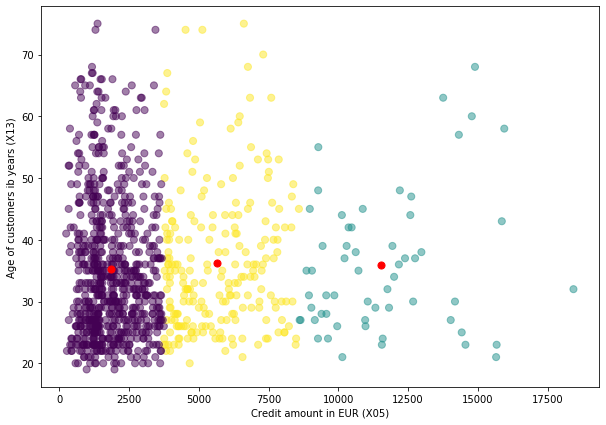

In [225]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(df['X05'], df['X13'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('Credit amount in EUR (X05)') 
ax.set_ylabel('Age of customers ib years (X13)')
plt.show()

In [226]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1469.36464088    35.61694291]
 [12511.71428571    36.66666667]
 [ 3583.58947368    34.67368421]
 [ 7127.52307692    36.8       ]]


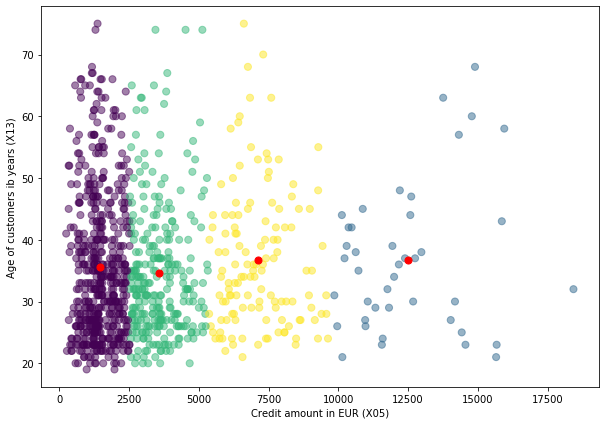

In [227]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(df['X05'], df['X13'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('Credit amount in EUR (X05)')
ax.set_ylabel('Age of customers ib years (X13)')
plt.show()

In [228]:
new_dfa =pd.DataFrame(data,columns=['X02','X05','X13'])

In [229]:
kmeans = KMeans(n_clusters=3).fit(new_dfa)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_dfa['label_kmeans'] = labels
print(centroids)

[[   17.05312085  1957.13944223    35.35989376]
 [   30.671875    5997.06770833    36.125     ]
 [   39.50909091 11747.18181818    36.07272727]]


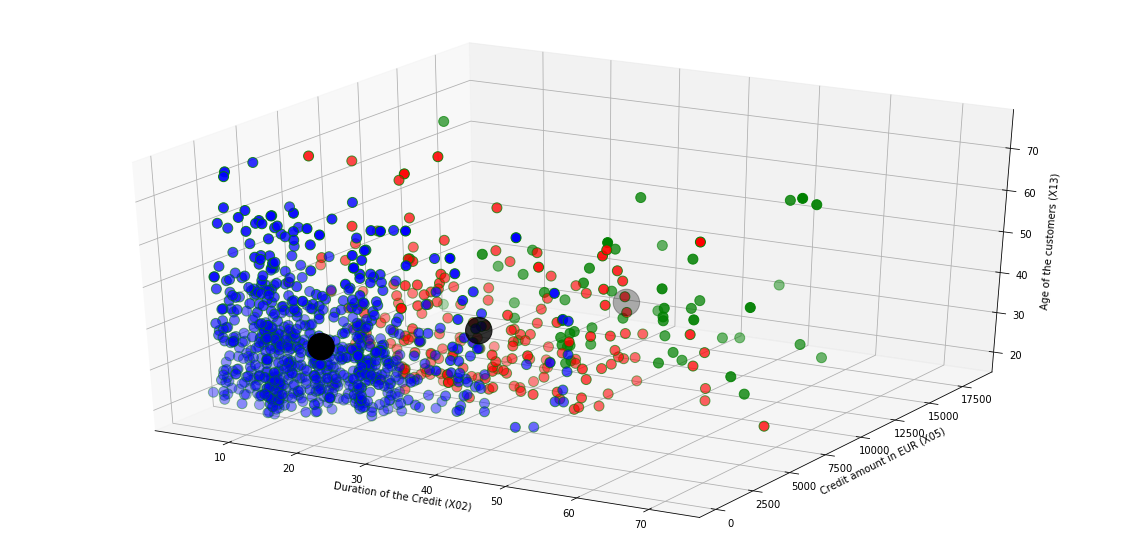

In [230]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_dfa.X02[new_dfa.label_kmeans == 0], new_dfa['X05'][new_dfa.label_kmeans == 0], new_dfa['X13'][new_dfa.label_kmeans == 0], c='blue', s=100, edgecolor='green')
ax.scatter(new_dfa.X02[new_dfa.label_kmeans == 1], new_dfa['X05'][new_dfa.label_kmeans == 1], new_dfa['X13'][new_dfa.label_kmeans == 1], c='red', s=100, edgecolor='green')
ax.scatter(new_dfa.X02[new_dfa.label_kmeans == 2], new_dfa['X05'][new_dfa.label_kmeans == 2], new_dfa['X13'][new_dfa.label_kmeans == 2], c='green', s=100, edgecolor='green')
ax.scatter(new_dfa.X02[new_dfa.label_kmeans == 3], new_dfa['X05'][new_dfa.label_kmeans == 3], new_dfa['X13'][new_dfa.label_kmeans == 3], c='orange', s=100, edgecolor='green')
ax.scatter(new_dfa.X02[new_dfa.label_kmeans == 4], new_dfa['X05'][new_dfa.label_kmeans == 4], new_dfa['X13'][new_dfa.label_kmeans == 4], c='purple', s=100, edgecolor='green')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=700);
plt.xlabel('Duration of the Credit (X02)')
plt.ylabel('Credit amount in EUR (X05)')
ax.set_zlabel('Age of the customers (X13)')
plt.show()
plt.show()